### Bibliotecas

In [2]:
# Instalação manual de bibliotecas
# !pip install numpy matplotlib pandas seaborn
# Bibliotecas


# import ml_utils as ml
# %load_ext autoreload
# %autoreload 2
# %run -i ml_utils
# %reload_ext autoreload

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math


### Funções utilitárias

In [14]:
def print_format(string, value):
    print(f"{string} =\n{value}")

# 3) Dada a base de dados CNAE_9_reduzido (em anexo):



## a) gere um gráfico 2D com os dois componentes principais (uso de PCA) das amostras, identificando cada classe (a base possui 5 classes. O rótulo das amostras está na primeira coluna. Essa coluna não deve ser usada no PCA). Pode usar a função eig do Matlab ou do Python. 


### Importando os dados

In [16]:
## Leitura inicial
# features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv('data/CNAE_9_reduzido.txt', sep=None, header = None)

data.head()

/tmp/ipykernel_124035/1595068272.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('data/CNAE_9_reduzido.txt', sep=None, header = None)


,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,500,501,502
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Calcular a matriz C: matriz de covariância / coeficientes de correlação dos dados;

In [17]:
# Usando matriz de covariância

faixa = np.arange(1,data.shape[1])
# print_format(faixa)

# calculamos os autovalores e autovetores da matriz de covariância
eigValues_cov, eigVectors_cov = np.linalg.eig(data.iloc[:,faixa].cov()) 
# print_format(eigValues_cov)
print_format("eigVectors_cov.shape = ", eigVectors_cov.shape)
print_format("eigVectors_cov = ", eigVectors_cov)

# #Subtrair dos dados a média
data_cov = data.iloc[:,faixa] - data.iloc[:,faixa].mean() 


# Usando matriz de coef. de correlação
eigValues_corr, eigVectors_corr = np.linalg.eig(data.iloc[:,faixa].corr())
# print_format("eigValues_corr", eigValues_corr)
print_format("eigVectors_corr = ", eigVectors_corr)

#Subtrair dos dados a média e divide pelo desvio padrão
data_corr = (data.iloc[:,faixa] - data.iloc[:,faixa].mean())/data.iloc[:,faixa].std()


# Selecionamos os dois primeiros autovetores (nesse caso, associados aos maiores autovalores)
# Matrizes de projeção dos dados
M_cov = eigVectors_cov[:,0:2]
M_corr = eigVectors_corr[:,0:2]

#Projeta os dados nos autovetores principais
proj_data_cov = data_cov @ M_cov
proj_data_corr = data_corr @ M_corr
print_format("proj_data_cov = ", proj_data_cov)

classes = data.iloc[:,0].unique()
print_format("classes = ", classes)


eigVectors_cov.shape = 
(502, 502)
eigVectors_cov = 
[[ 1.26165128e-03+0.00000000e+00j -3.65184823e-04+0.00000000e+00j
  -1.97830331e-03+0.00000000e+00j ... -7.26172859e-03-1.80626932e-03j
  -7.26172859e-03+1.80626932e-03j -7.08076352e-03+0.00000000e+00j]
 [ 1.30532092e-03+0.00000000e+00j  1.44828288e-03+0.00000000e+00j
  -1.72673708e-03+0.00000000e+00j ... -2.51579044e-15+9.19726227e-16j
  -2.51579044e-15-9.19726227e-16j -3.89706870e-15+0.00000000e+00j]
 [-1.51630847e-02+0.00000000e+00j -1.13711288e-01+0.00000000e+00j
  -1.12727186e-02+0.00000000e+00j ...  1.51189287e-16+1.06608067e-18j
   1.51189287e-16-1.06608067e-18j  3.88526230e-17+0.00000000e+00j]
 ...
 [ 9.49782103e-04+0.00000000e+00j  2.91862538e-04+0.00000000e+00j
  -1.87448527e-03+0.00000000e+00j ...  3.91465101e-16+1.41360165e-16j
   3.91465101e-16-1.41360165e-16j  2.95271416e-16+0.00000000e+00j]
 [-8.56531133e-02+0.00000000e+00j  3.39352737e-02+0.00000000e+00j
  -2.31016203e-02+0.00000000e+00j ...  5.59099690e-17+1.90860252

Plota os gráficos

[2.2911311  2.6204521  2.69880917]


/home/harmonia/codes/machine-learning-laboratory-2023-2/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/harmonia/codes/machine-learning-laboratory-2023-2/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


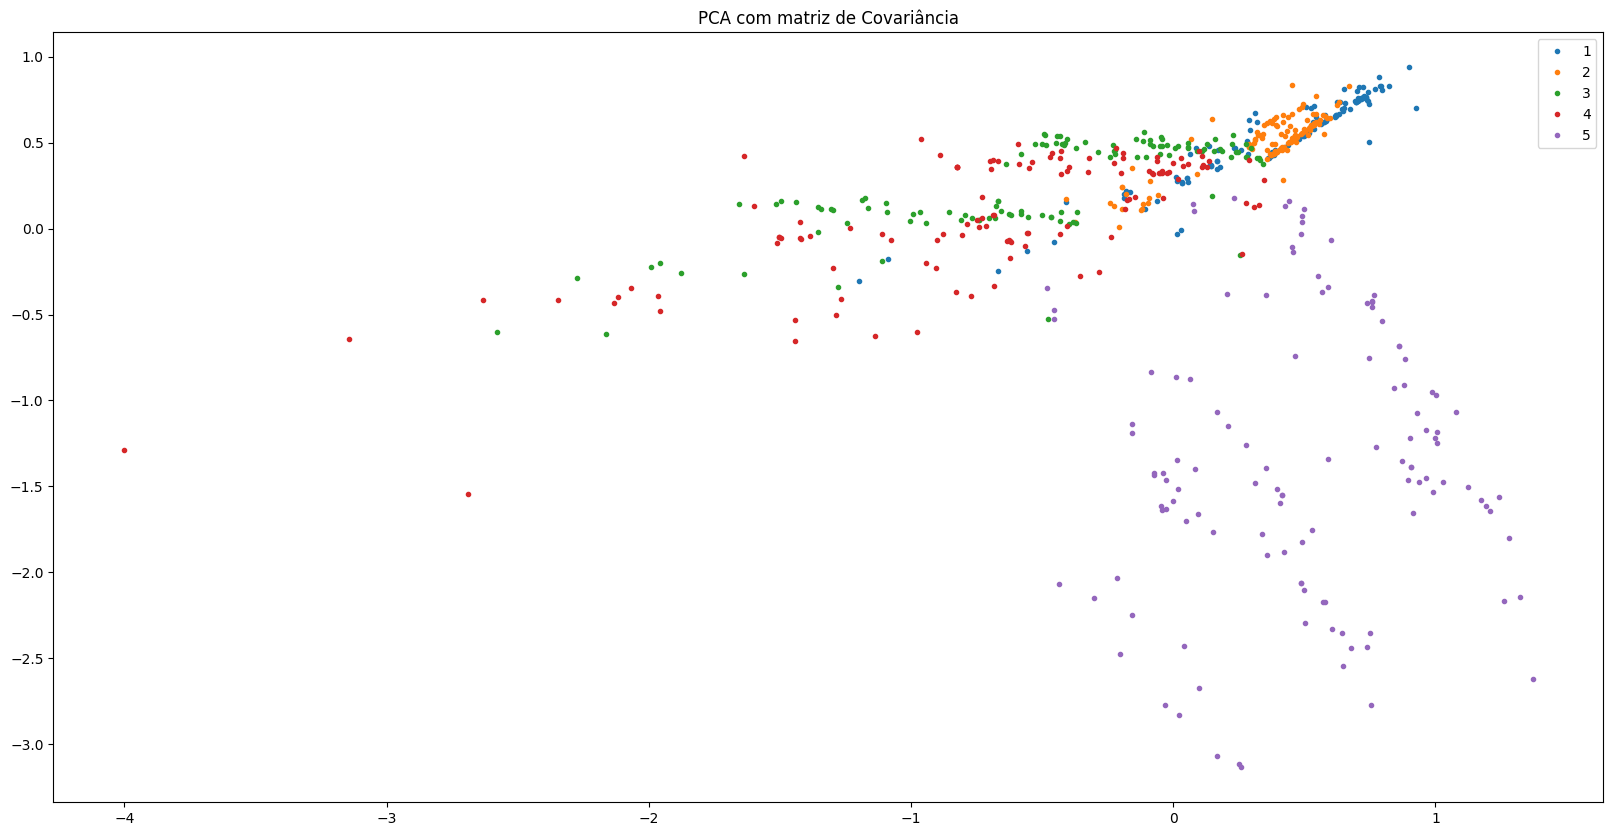

In [18]:
print(np.random.uniform(1,3,3))
# Cria o canvas
xsize = 20
ysize = 10
fig = plt.figure(figsize=(xsize,ysize))

# define cores
colors = ['tab:blue' ,'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Plota os gráficos
for i in range(0,classes.size):
	data_select = proj_data_cov[data.iloc[:,0] == classes[i]]
	# print_format("data_select", data_select)
	plt.plot(data_select[1],data_select[0], marker='.', linestyle='', c=colors[i])

# Títulos e labels de figura
legend = classes
plt.title("PCA com matriz de Covariância")
plt.legend(legend)

# # Cria outro canvas
# fig = plt.figure(figsize=(xsize,ysize))

# # Plota os gráficos
# for i in range(0,classes.size):
# 	data_select = proj_data_corr[data.iloc[:,0] == classes[i]]
# 	# print_format("data_select", data_select)
# 	plt.plot(data_select[1],data_select[0], marker='.', linestyle='', c=colors[i])

# # Títulos e labels de figura
# legend = classes
# plt.title("PCA com matriz de coeficentes de correlação")
# plt.legend(legend)

## b) gere um gráfico 2D com os dois componentes principais (uso de PCA) das amostras, identificando cada classe (a base possui 5 classes). Para este gráfico realize o branqueamento dos dados (isto é, após a aplicação do PCA garantir que a matriz de covariância dos dados seja uma matriz identidade). O que tem de diferente entre os gráficos de a) e b)?

In [19]:
# Usando matriz de coeficientes de correlação

# seleciona colunas de 1 até a última
faixa = np.arange(1,data.shape[1])

# calculamos os autovalores e autovetores da matriz de coeficientes de correlação
eigValues_corr, eigVectors_corr = np.linalg.eig(data.iloc[:,faixa].corr()) 

# print_format("eigVectors_corr.shape = ", eigVectors_corr.shape)
# print_format("eigVectors_corr = ", eigVectors_corr)

# #Subtrair dos dados a média e dividir pelo desvio padrão
data_corr = (data.iloc[:,faixa] - data.iloc[:,faixa].mean())/data.iloc[:,faixa].std()

# Selecionamos os dois primeiros autovetores (nesse caso, associados aos maiores autovalores)
# Matrizes de projeção dos dados
M_corr = eigVectors_corr[:,0:2]

# Projeta os dados nos autovetores principais, realizando branqueamento dos dados

V = np.diag(eigValues_corr[0:2]) # quais autovalores tenho que botar nesse cálculo?

## Equação de branqueamento: proj_data_corr = data_corr * M_corr * T(V^(-1/2))
V_op = np.transpose(np.linalg.inv(np.sqrt(V)))
proj_data_corr = data_corr @ M_corr @ V_op
# print_format("proj_data_corr = ", proj_data_corr)

classes = data.iloc[:,0].unique()
# print_format("classes = ", classes)

# Verificando que a matriz de covariância no resultado do PCA é a matriz identidade
print_format("proj_data_corr.cov()", proj_data_corr.cov())


proj_data_corr.cov()
              0             1
0  1.000000e+00 -2.256774e-15
1 -2.256774e-15  1.000000e+00


/home/harmonia/codes/machine-learning-laboratory-2023-2/.venv/lib/python3.10/site-packages/pandas/core/internals/managers.py:1650: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array(blk.values, dtype=dtype, copy=copy)


Gerando os gráficos:

[1.71273643 2.64318113 2.56472901]


/home/harmonia/codes/machine-learning-laboratory-2023-2/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/harmonia/codes/machine-learning-laboratory-2023-2/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


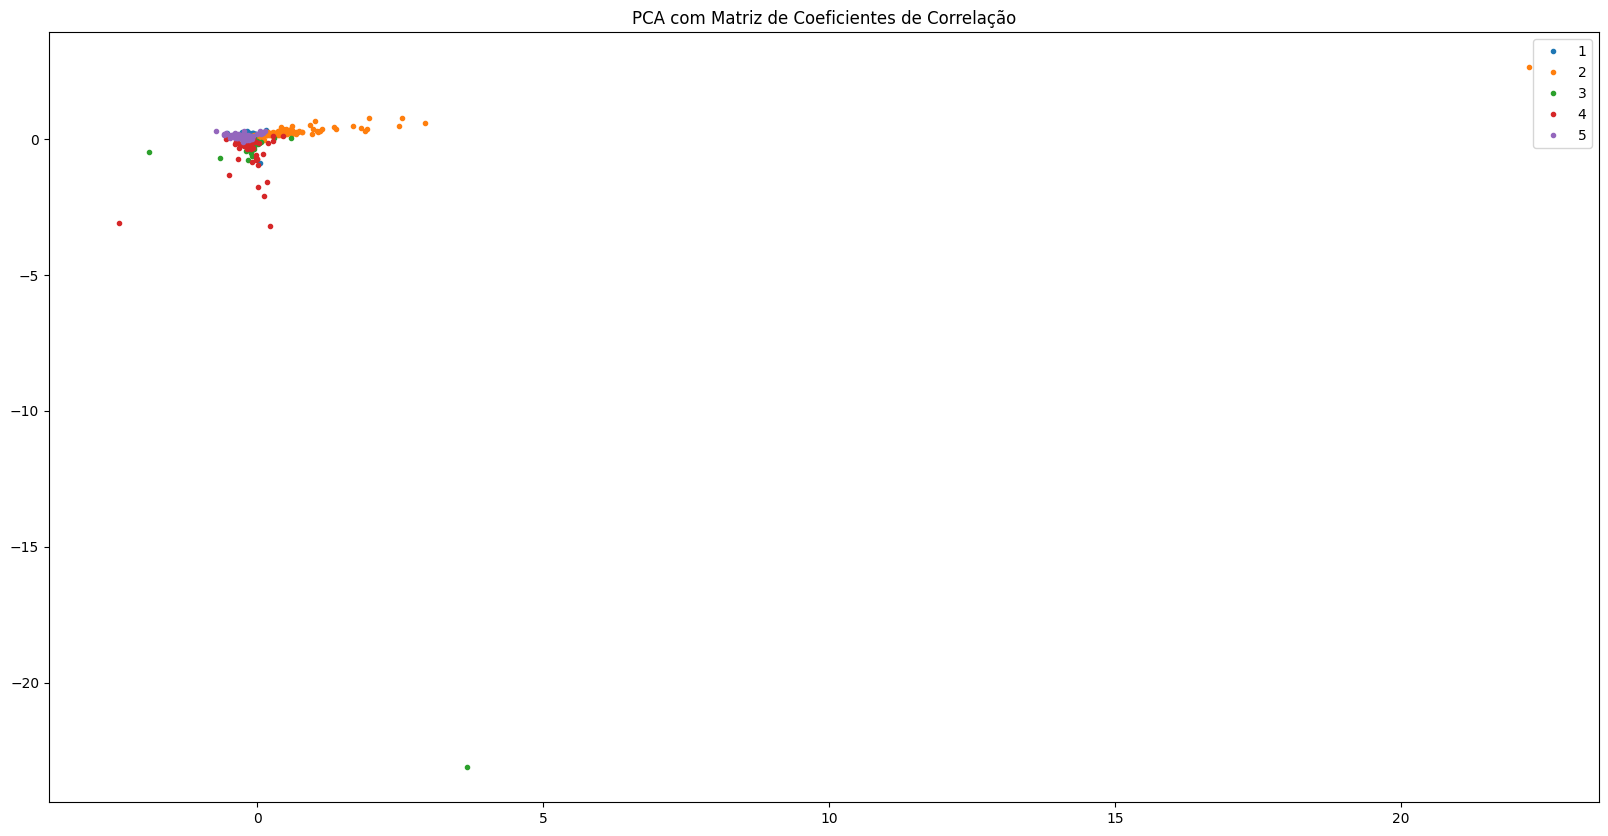

In [20]:
print(np.random.uniform(1,3,3))
# Cria o canvas
xsize = 20
ysize = 10
fig = plt.figure(figsize=(xsize,ysize))

# define cores
colors = ['tab:blue' ,'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Plota os gráficos
for i in range(0,classes.size):
	data_select = proj_data_corr[data.iloc[:,0] == classes[i]]
	# print_format("data_select", data_select)
	plt.plot(data_select[1],data_select[0], marker='.', linestyle='', c=colors[i])

# Títulos e labels de figura
legend = classes
plt.title("PCA com Matriz de Coeficientes de Correlação")
plt.legend(legend)



## c) gere um gráfico 2D usando o t-SNE (pode usar o código disponível em https://lvdmaaten.github.io/tsne/ com os parâmetros default), identificando cada classe (a base possui 5 classes). Lembre-se de não usar a coluna de rótulos para obter a redução de dimensão.

In [21]:
import numpy as np
import pylab
from tsne import *

# print(data.shape[1])

In [22]:
print("Run Y = tsne.tsne(X, no_dims, perplexity) to perform t-SNE on your dataset.")

# Coloca dados de entrada sem a coluna de classes
X = data.iloc[:,faixa]
n_collumns = data.shape[1] - 1

Y = tsne(X, 2, n_collumns, 20.0)

Run Y = tsne.tsne(X, no_dims, perplexity) to perform t-SNE on your dataset.
Preprocessing the data using PCA...


Computing pairwise distances...
Computing P-values for point 0 of 600...
Computing P-values for point 500 of 600...
Mean value of sigma: 0.929441
Iteration 10: error is 16.268898
Iteration 20: error is 14.947423
Iteration 30: error is 14.871822
Iteration 40: error is 14.766761
Iteration 50: error is 14.844838
Iteration 60: error is 15.202609
Iteration 70: error is 15.405502
Iteration 80: error is 15.142455
Iteration 90: error is 15.009091
Iteration 100: error is 15.570774
Iteration 110: error is 1.874712
Iteration 120: error is 1.405921
Iteration 130: error is 1.209402
Iteration 140: error is 1.054749
Iteration 150: error is 0.980193
Iteration 160: error is 0.949741
Iteration 170: error is 0.929702
Iteration 180: error is 0.916486
Iteration 190: error is 0.906343
Iteration 200: error is 0.898039
Iteration 210: error is 0.891080
Iteration 220: error is 0.885083
Iteration 230: error is 0.878947
Iteration 240: error is 0.873694
Iteration 250: error is 0.870469
Iteration 260: error is 0.86

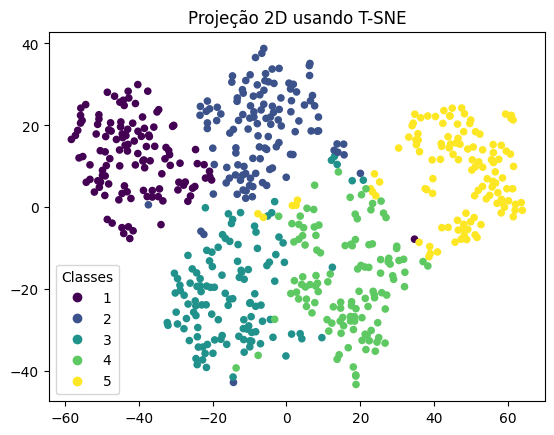

In [23]:
fig, ax = plt.subplots()

# Plota os gráficos
scatter = plt.scatter(Y[:, 0], Y[:, 1], 20, data.iloc[:,0])

# Produz legenda com cores únicas a partir do scatterplot
legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")

plt.title("Projeção 2D usando T-SNE")

plt.show()

## d) Utilize as primeiras 480 amostras para treinar o classificador vizinho mais próximo (NN) (utilize a distância Euclidiana) e as demais 120 para teste. Calcule a métrica acurácia e informe o valor obtido. Pelo resultado obtido, qual dos gráficos (t-SNE ou PCA) você acha que melhor representou a “realidade” da distribuição dos dados? Por quê?

### Functions

In [24]:
# Entradas: 
#   data_input     -> matriz de dados a serem classificados (linhas são amostras, colunas são features)
#   features_model -> matriz de dados de treinamento (linhas são amostras, colunas são features)
#   classes_model  -> matriz de dados de classificação (linhas são amostras na mesma ordem de 'features_model', valores são classe de cada amostra)
# Retorna: Matriz de resultados com classificação das amostras de entrada
def nn(data_input=np.array([]), data_model=np.array([]), classes_model=np.array([])):
    print("TODO")
    # Calcula a distância euclidiana a todos os pontos do modelo
    # Calcula o ponto mais próximo
    # Adiciona classificação do ponto mais próximo
    

### Faixas

In [25]:
train_range = np.arange(0,480)
data_train = data.iloc[train_range,:] 

test_range = np.arange(481,data.shape[0])
data_test = data.iloc[test_range,:]

### Treinamento